In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy


In [10]:
sc.settings.verbosity = 0

In [2]:
ada = sc.read_h5ad('./data/hca_heart_immune.h5ad')
ada

AnnData object with n_obs × n_vars = 40868 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_states', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'type', 'version', 'scNym', 'scNym_confidence'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_scnym', 'X_umap'

In [3]:
print(len(np.unique(ada.obs['cell_states'])))
np.unique(ada.obs['cell_states'])

22


array(['B_cells', 'CD16+Mo', 'CD4+T_cytox', 'CD4+T_tem', 'CD8+T_cytox',
       'CD8+T_tem', 'DC', 'DOCK4+MØ1', 'DOCK4+MØ2', 'IL17RA+Mo',
       'LYVE1+MØ1', 'LYVE1+MØ2', 'LYVE1+MØ3', 'Mast', 'Mo_classic',
       'Mo_pi', 'MØ_AgP', 'MØ_mod', 'NK', 'NKT', 'NØ', 'doublets'],
      dtype=object)

In [4]:
ada = ada[ada.obs.cell_states != 'doublets', :]
ada

View of AnnData object with n_obs × n_vars = 40245 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_states', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'type', 'version', 'scNym', 'scNym_confidence'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_scnym', 'X_umap'

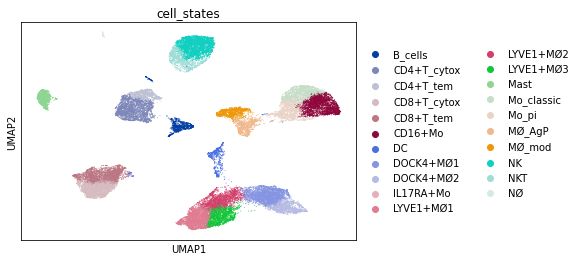

In [11]:
sc.pl.umap(ada, color='cell_states')

NP, neutrophils; <br>
NK, natural killer; <br>
NKT, natural killer T cells; <br>
CD4+T_tem, effector-memory CD4+ T cells; <br>
CD4+T_cytox, CD4+ cytotoxic T cells; <br>
CD8+T_tem, CD8+ effector-memory T cells; <br>
CD8+T_cytox, CD8+ cytotoxic T cells; <br>
DC, dendritic cells; CD14+Mo, CD14+ monocytes; <br>
CD16+Mo, CD16+ monocytes; <br>
Mo_pi, pro-inflammatory monocytes; <br>
IL17RA+Mo, IL17RA+ monocytes; <br>
MP_AgP, HLA class II antigen-presenting macrophages; <br>
MP_mod, monocyte-derived macrophages; <br>
LYVE1+MP1–3, M2-like, LYVE1+ macrophages sets 1–3; <br>
DOCK4+MΦ1–2, DOCK4+ macrophage sets 1–2; <br>
B_cells, B cells; <br>
plasma, plasma B cells. <br>

In [6]:
HVG_i = np.argsort(np.asarray(ada.var['vst.variance.standardized']))[-3000:]
ada = ada[:, HVG_i].copy()
ada

AnnData object with n_obs × n_vars = 40245 × 3000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_states', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'type', 'version', 'scNym', 'scNym_confidence'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_states_colors'
    obsm: 'X_pca', 'X_scnym', 'X_umap'

In [7]:
counts = scipy.sparse.csr_matrix.toarray(ada.raw.X)
counts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
data = scipy.sparse.csr_matrix.toarray(ada.X)
data

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [3.374468 , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 1.867016 , 0.       , ..., 0.       , 0.       ,
        4.626695 ],
       [0.       , 2.3066452, 0.       , ..., 0.       , 0.       ,
        3.1823764],
       [0.       , 0.       , 0.       , ..., 1.7744708, 0.       ,
        0.       ]], dtype=float32)

In [9]:
#ada.write('heart_immune.h5ad')